In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [2]:
# remove all saved images in the current directory
for file in os.listdir():
    if file.endswith('.png'):
        os.remove(file)

### Exact Solution

In [3]:
nu = 1e-6
def exactSol(x, y):
    #x[0]*x[1]*x[1] - x[1]*x[1]*exp((2*(x[0] - 1))/nu) - x[0]*exp(3*(x[1] - 1)/nu) + exp((2*(x[0] - 1) + 3*(x[1] - 1))/nu);
    return x*y*y - y*y*np.exp((2*(x - 1))/nu) - x*np.exp(3*(y - 1)/nu) + np.exp((2*(x - 1) + 3*(y - 1))/nu)

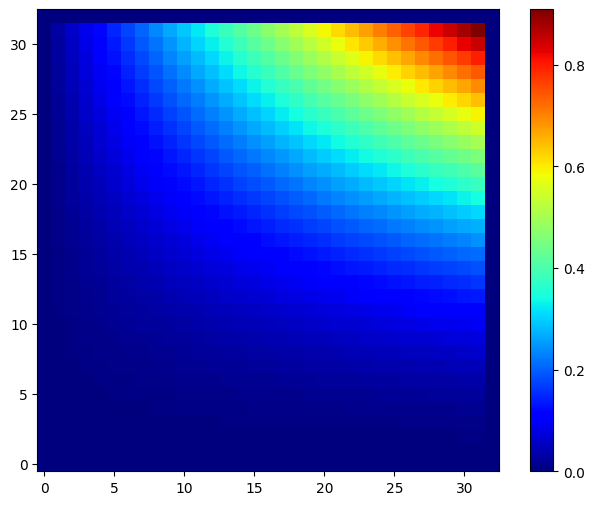

(33, 33)


In [4]:
x = np.linspace(0, 1, 33)
y = np.linspace(0, 1, 33)
X, Y = np.meshgrid(x, y)
Z = exactSol(X, Y)
# plt.figure(figsize=(8, 6))
# cp = plt.contourf(X, Y, Z, cmap='jet')
# plt.colorbar(cp)  # Add a colorbar
# plt.show()
# plot exact solution without contour
plt.figure(figsize=(8, 6))
plt.imshow(Z, cmap='jet', origin='lower')
plt.colorbar()
plt.show()
print(Z.shape)

### Plot Solutions

In [5]:
def plots2D(Z = 0, title = 'plot'):
    N = Z.shape[0]
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)

    # subplot
    plt.figure(figsize=(12, 6))
    im = plt.imshow(Z, cmap='jet', origin='lower')
    # plt.set_xlabel('X')
    # plt.set_ylabel('Y')
    
    cbar = plt.colorbar(im)
    cbar.set_label('Function Value')

    plt.tight_layout()
    plt.savefig(title + '.png')  # Save as PNG
    plt.show()

1089
N =  33


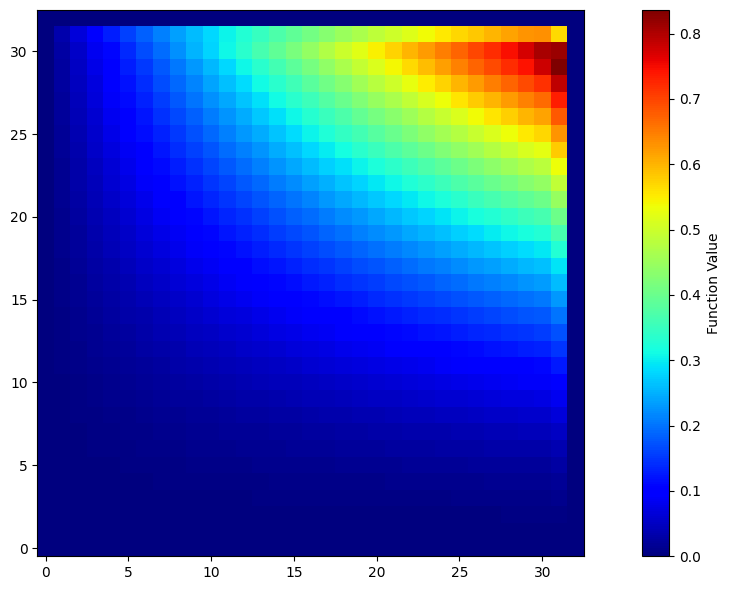

(33, 33)


In [6]:
path = '../TestResults/TestCase1/1.7_perturbed/fdaPDE_SUPG_sol.txt'
# path = '../TestResults/TestCase0/0.10_perturbed/fdaPDE_SUPG_sol.txt'
data = np.loadtxt(path, delimiter=',')
print(data.size)
N = int(np.sqrt(data.size))
print("N = ", N)
data = data.reshape(N,N)
plots2D(data, 'TestCase1_sol')
print(data.shape)

norm2 =  0.6974084728252362
norm_inf =  2.726653953125


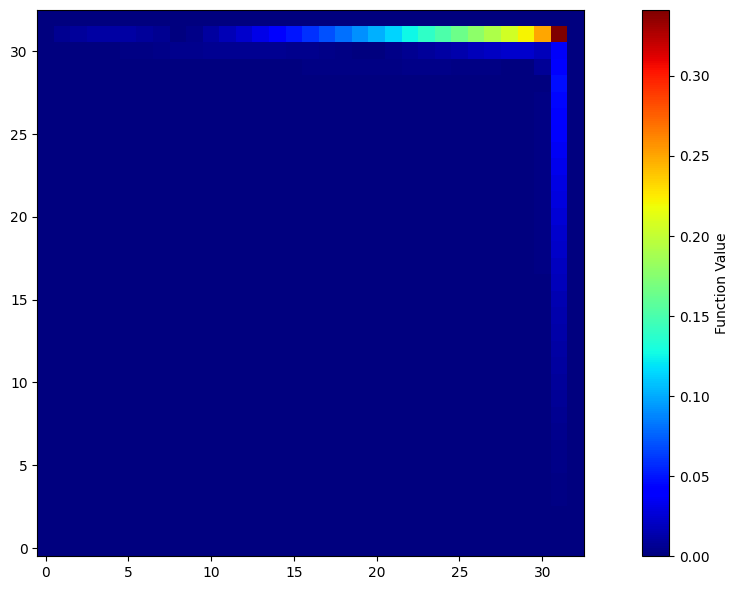

In [7]:
# check error between femR and exact
femR_error = np.abs(data - Z)
norm_error_2 = np.linalg.norm(femR_error, 2)
norm_error_inf = np.linalg.norm(femR_error, np.inf)
print("norm2 = ", norm_error_2)
print("norm_inf = ", norm_error_inf)
plots2D(femR_error, 'TestCase1_error')

### Delete previous observations and files

In [ ]:
# delete a directory and all its content
shutil.rmtree('../../fdaPDE-cpp/test/data/transport/TransportTestCase1')
# recreate the directory empty
os.makedirs('../../fdaPDE-cpp/test/data/transport/TransportTestCase1')

### Save observations and locations

In [ ]:
n = 30
while n <= 70:
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    # create a two columns matrix with all the possible combinations of x and y
    z = np.array([[i, j] for i in x for j in y])
    
    observations = exactSol(z[:,0], z[:,1])
    row_indices = np.arange(1, n*n + 1)
    result_matrix = np.column_stack((row_indices, observations))
    column_names = np.array(['', 'x'])
    result_matrix = np.vstack((column_names, result_matrix))
    np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase1/observations' + str(n) + '.csv', result_matrix, delimiter=',', fmt='%s')
    
    z = np.array([[j, i] for i in x for j in y])
    z = np.column_stack((row_indices, z))
    column_names = np.array(['', 'V1', 'V2'])
    z = np.vstack((column_names, z))
    np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase1/locs' + str(n) + '.csv', z, delimiter=',', fmt='%s')
    n += 10

### Save excpected

In [ ]:
# data = np.loadtxt('../TestResults/TestCase0/0.10_perturbed/fdaPDE_SUPG_sol.txt')
# data = np.loadtxt('../TestResults/TestCase1/1.7_perturbed/fdaPDE_SUPG_sol.txt')
# save expected from exact solution
N = Z.size
row_indices = np.arange(1, N + 1)
Z = np.column_stack((row_indices, Z.flatten()))
column_names = np.array(['', 'x'])
Z = np.vstack((column_names, Z ))
np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase1/expected.csv', Z, delimiter=',', fmt='%s')

### Plot `model.f()`

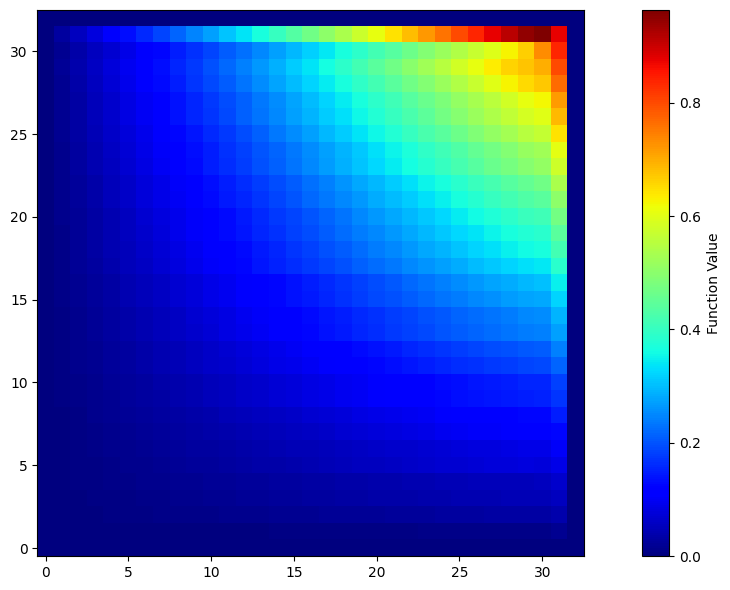

In [8]:
# path  = '../../fdaPDE-cpp_Carlotta/fdaPDE-cpp/test/build/'
path  = '../../fdaPDE-cpp/test/build/'
modelf = np.loadtxt(path + 'modelf.txt', delimiter=',')
N = int(np.sqrt(modelf.size))
modelf = modelf.reshape(N,N)
plots2D(modelf, 'TestCase1_modelf')

In [ ]:
# path  = '../../fdaPDE-cpp_Carlotta/fdaPDE-cpp/test/build/'
path  = '../../fdaPDE-cpp/test/build/'
gridf = np.loadtxt(path + 'gridf.txt', delimiter=',')
N = int(np.sqrt(gridf.size))
gridf = gridf.reshape(N,N)
plots2D(gridf, 'gridf')

In [9]:
# compute error between model.f() and the exact solution (data)
error = np.abs(modelf - data)
# compute norm2 and norminf of the error
norm_error_2 = np.linalg.norm(error, 2)
norm_error_inf = np.linalg.norm(error, np.inf)
print("norm2 = ", norm_error_2)
print("norm_inf = ", norm_error_inf)

norm2 =  1.481292040739331
norm_inf =  3.4560936696073616


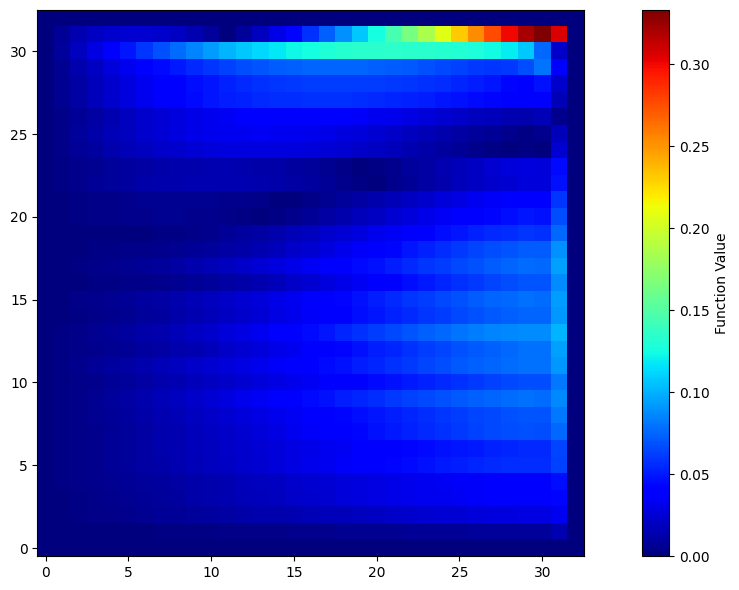

In [10]:
plots2D(error, 'TestCase2_error')

In [ ]:
# without stabilization

In [ ]:
# stabilization parameter 10

In [ ]:
# stabilization parameter 1.075 

### Boxplots

In [13]:
directory_testcase = '../Tests_fdaPDE-cpp/TestCase1/'
# build directory
# directory_build = '../../fdaPDE-cpp_Carlotta/fdaPDE-cpp/test/build/'
directory_build = '../../fdaPDE-cpp/test/build/'
# remove directory and its content
shutil.rmtree(directory_testcase + 'RMSEs/')
# recreate emtpy directory
os.makedirs(directory_testcase + 'RMSEs/')
# copy all .csv files from the directory .../build to the current directory
for file in os.listdir(directory_build):
    if file.endswith('.csv'):
        shutil.copy(directory_build + file, directory_testcase + 'RMSEs/') 

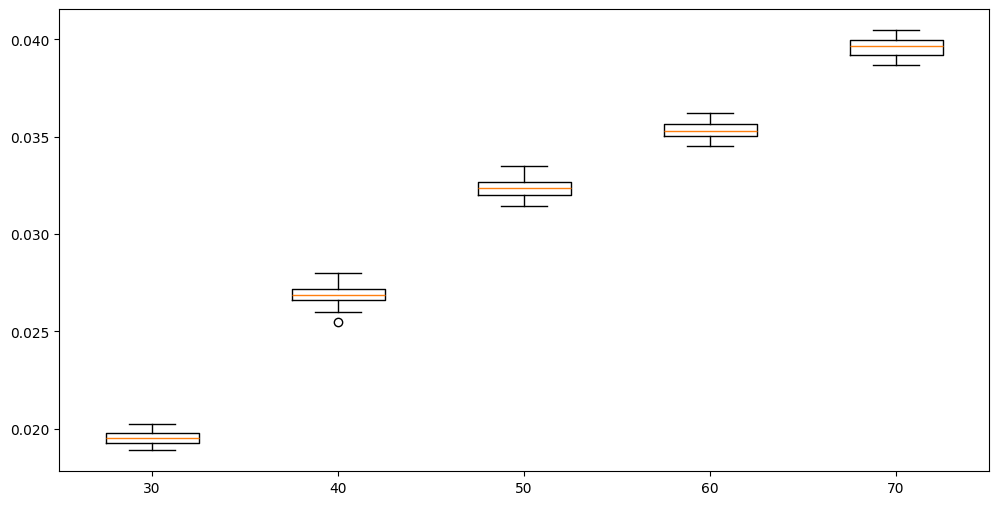

In [14]:
data = {}
i = 30
while i <= 70:
    current = np.loadtxt(directory_testcase + 'RMSEs/RMSE_' + str(i) + '.csv')
    data[i] = current
    i += 10

plt.figure(figsize=(12, 6))
plt.boxplot(data.values())
plt.xticks(range(1, len(data.keys()) + 1), data.keys())
plt.savefig('TestCase1_boxplots.png', dpi = 600)
plt.show()

#### Prepare test locations when you have exact solution

In [ ]:
# test locations for the gridf
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
z = np.array([[i, j] for i in x for j in y])
observations = exactSol(z[:,0], z[:,1])
row_indices = np.arange(1, n*n + 1)
result_matrix = np.column_stack((row_indices, observations))
column_names = np.array(['', 'x'])
result_matrix = np.vstack((column_names, result_matrix))
np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase0/test_values.csv', result_matrix, delimiter=',', fmt='%s')

z = np.array([[j, i] for i in x for j in y])
z = np.column_stack((row_indices, z))
column_names = np.array(['', 'V1', 'V2'])
z = np.vstack((column_names, z))
np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase0/test_locs.csv', z, delimiter=',', fmt='%s')


In [ ]:
# compare error between gridf and exact solution
gridf_exact = observations.reshape(100, 100).T # this transpose is the reason why I need to invert z to save the locations
plots2D(gridf_exact, 'gridf_exact')

In [ ]:
# put in a subplot 2x2 both gridf and observations transposed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gridf, cmap='jet', origin='lower')
plt.title('FEM interpolation of model.f()')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(gridf_exact, cmap='jet', origin='lower')
plt.title('exact sol')
plt.colorbar()
plt.tight_layout()
# save plot
plt.savefig('gridf_gridf_exact.png')
plt.show()


In [ ]:
# compute error between model.f() and the exact solution (data)
error = np.abs(gridf - gridf_exact)
# compute norm2 and norminf of the error
norm_error_2 = np.linalg.norm(error, 2)
norm_error_inf = np.linalg.norm(error, np.inf)
print("norm2 = ", norm_error_2)
print("norm_inf = ", norm_error_inf)

In [ ]:
plots2D(error, 'gridf_error')